# Unit 5 - Financial Planning


In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=US"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=US"

In [8]:
# Fetch current BTC price
my_btc_data = requests.get(btc_url).json()
my_btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18673731,
   'total_supply': 18673731,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 57924.0,
     'volume_24h': 44704198030,
     'market_cap': 1082412578398,
     'percentage_change_1h': -0.549496757912419,
     'percentage_change_24h': 1.49496666917148,
     'percentage_change_7d': 3.940141741083,
     'percent_change_1h': -0.549496757912419,
     'percent_change_24h': 1.49496666917148,
     'percent_change_7d': 3.940141741083}},
   'last_updated': 1617584608}},
 'metadata': {'timestamp': 1617584608,
  'num_cryptocurrencies': 1319,
  'error': None}}

In [9]:
# Fetch current ETH price
my_eth_data = requests.get(eth_url).json()
my_eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115337195,
   'total_supply': 115337195,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2056.96,
     'volume_24h': 25844388119,
     'market_cap': 237549484604,
     'percentage_change_1h': -1.22879564244514,
     'percentage_change_24h': 2.25382710858871,
     'percentage_change_7d': 21.7831053817006,
     'percent_change_1h': -1.22879564244514,
     'percent_change_24h': 2.25382710858871,
     'percent_change_7d': 21.7831053817006}},
   'last_updated': 1617584680}},
 'metadata': {'timestamp': 1617584680,
  'num_cryptocurrencies': 1319,
  'error': None}}

In [10]:
# STORE BITCOIN PRICE IN A VARIABLE
my_btc_price = my_btc_data['data']['1']['quotes']['USD']['price']
my_btc_price

57924.0

In [11]:
# STORE ETHEREUM PRICE IN A VARIABLE
my_eth_price = my_eth_data['data']['1027']['quotes']['USD']['price']
my_eth_price

2056.96

In [12]:
# Compute current value of my crpto
my_btc_value = my_btc_price * my_btc
my_eth_value = my_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69508.80
The current value of your 5.3 ETH is $10901.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# VERIFY THAT ALPACA KEY AND SECRET WERE CORRECTLY LOADED
print(f"Alpaca key type: {type(alpaca_api_key)}")
print(f"Alpaca secret key type: {type(alpaca_api_key)}")

Alpaca key type: <class 'str'>
Alpaca secret key type: <class 'str'>


In [15]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [16]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
2020-07-01 00:00:00-04:00  117.9  118.07  117.76  118.03  6247232  309.57   

                                                             
                             high     low   close    volume  
2020-07-01 00:00:00-04:00  311.89  309.07  310.57  61458161

In [17]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.03
Current SPY closing price: $310.57


In [18]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15528.50
The current value of your 200 AGG shares is $23606.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_income = 12000

# CALCULATE CRYPTO ASSETS' TOTAL VALUE
crypto_total = my_btc_value + my_eth_value

# CALCULATE SHARES' TOTAL VALUE
shares_total = my_spy_value + my_agg_value

# Create savings DataFrame
data = [crypto_total, shares_total]

df_savings = pd.DataFrame(data, columns = ["amount"], index = ["crypto", "shares"])
# Display savings DataFrame
display(df_savings)

,amount
crypto,80410.688
shares,39134.500


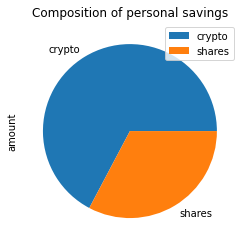

In [20]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title = "Composition of personal savings")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_total + shares_total

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    difference = emergency_fund - total_savings
    print(f"Sorry, there is still ${difference} away to reach your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

# Set the ticker
ticker = ["AGG", "SPY"]

# Set timeframe to '1D'
timeframe = "1D"

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    ticker,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [24]:
# Configuring a Monte Carlo simulation of 100 to forecast 1 years cumulative returns
num_sims = 100

MC_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252 * 1
)

# Printing the simulation input data
MC_data.portfolio_data.head()

# Running a Monte Carlo simulation to forecast 1 years cumulative returns
MC_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992911,0.993482,0.995516,0.983729,1.007244,1.015151,0.998596,1.004479,0.998551,0.996089,...,0.996519,1.000200,1.010688,0.993254,1.002873,1.008362,1.011607,1.002773,0.993256,1.002340
2,1.006930,0.986496,1.004081,0.975359,1.005925,1.009821,1.002414,1.000610,1.010268,0.993769,...,0.985763,0.999835,1.020690,0.995035,0.994461,0.995557,1.017801,0.995705,0.979896,0.987129
3,0.998413,0.981276,1.000948,0.967773,1.003364,1.003990,0.990307,0.995210,1.012339,1.007597,...,0.984064,1.001106,1.032447,0.994250,0.995582,0.997864,1.011880,0.987788,0.982618,0.980702
4,1.004636,0.980243,0.998307,0.960667,1.005649,1.010350,0.996973,0.993341,1.006666,1.000711,...,0.991580,0.998244,1.027640,0.996236,1.008683,0.988810,1.015244,0.992974,0.976429,0.975460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.115015,1.041500,0.962242,0.991539,0.925418,1.271360,1.068281,0.940816,1.140344,0.858914,...,0.991037,1.070109,0.837880,1.092614,0.778492,1.273196,0.965711,0.924512,0.893701,0.980291
249,1.110103,1.056195,0.963008,0.995231,0.924139,1.256418,1.078235,0.935806,1.140898,0.858441,...,0.981059,1.062003,0.843935,1.086001,0.778072,1.258676,0.963554,0.931662,0.897691,0.989972
250,1.107436,1.057479,0.955735,0.984305,0.929866,1.259728,1.083182,0.937604,1.141153,0.857812,...,0.980480,1.050052,0.849915,1.099795,0.776496,1.244132,0.966111,0.929371,0.898500,0.990569
251,1.111514,1.053660,0.952102,0.984448,0.929518,1.259147,1.087020,0.946810,1.147716,0.857760,...,0.988718,1.049528,0.855109,1.103847,0.782229,1.241137,0.968823,0.927065,0.888892,0.991080


In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

# Printing the simulation input data
MC_data.portfolio_data.head()

# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001026,0.992476,1.001595,1.007587,1.001162,1.017548,0.984729,0.984632,1.012170,0.995515,...,1.002947,1.010351,0.995877,1.015352,0.999909,1.001441,0.991651,0.999872,1.001292,1.005588
2,0.997176,0.974875,0.996148,1.001204,1.011760,1.013569,0.987703,0.986825,1.013046,0.991892,...,1.005432,1.024852,0.990844,1.027172,0.994765,1.009955,0.998761,0.979747,0.997723,1.015834
3,0.995201,0.964045,1.015407,0.990025,1.009291,1.001862,0.986100,0.981576,0.998679,1.003153,...,0.995693,1.020159,0.987214,1.017440,0.997564,1.011685,1.003647,0.986849,0.990974,1.006075
4,0.995908,0.970811,1.017280,0.988463,1.012643,1.005691,0.972675,0.999561,1.005816,1.000101,...,0.987955,1.037077,0.993243,1.027408,0.997135,0.998589,1.008051,0.998233,0.990936,1.019152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.474152,12.015588,9.832297,6.797086,10.648683,11.010820,17.921418,5.040283,14.703041,6.558769,...,6.448030,4.385309,9.283027,6.775199,13.396468,20.758796,7.216772,7.243141,11.808896,11.157435
7557,6.480087,11.832845,9.840648,6.846411,10.675755,11.065057,17.827775,5.054170,14.609266,6.621337,...,6.394449,4.403501,9.297476,6.775834,13.430248,20.795392,7.225327,7.240708,11.796883,11.078088
7558,6.541548,12.009606,9.809681,6.863258,10.630162,11.156850,17.793176,5.061722,14.622265,6.512849,...,6.377053,4.396709,9.254664,6.708597,13.513825,20.940312,7.358982,7.148798,11.726993,11.219745
7559,6.527852,11.966720,9.706873,6.789866,10.553382,11.087740,17.831859,5.062017,14.671830,6.585880,...,6.402586,4.373650,9.352984,6.660651,13.678107,21.180475,7.371918,7.211489,11.780264,11.228919


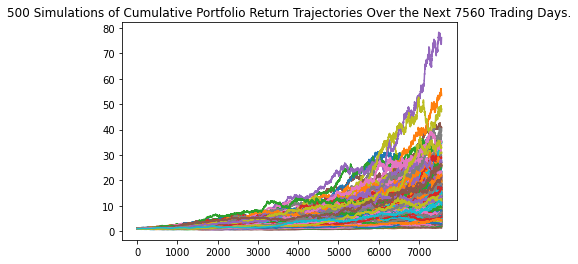

In [26]:
# Plot simulation outcomes
line_plot = MC_data.plot_simulation()

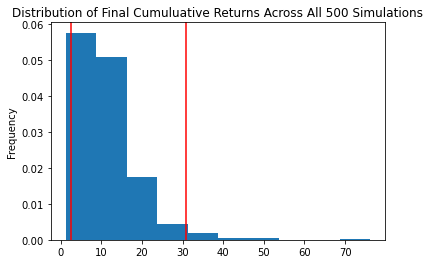

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_data.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
data_summary = MC_data.summarize_cumulative_return()

# Print summary statistics
print(data_summary)

count           500.000000
mean             11.446516
std               7.738891
min               1.251543
25%               6.407665
50%               9.880414
75%              14.307678
max              76.174257
95% CI Lower      2.590866
95% CI Upper     30.853117
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(data_summary[8] * initial_investment, 2)
ci_upper = round(data_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51817.33 and $617062.34


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(data_summary[8] * initial_investment, 2)
ci_upper = round(data_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $77725.99 and $925593.51


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [42]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.020756,1.009248,1.007378,1.002736,1.008668,0.995960,0.997392,1.003103,1.005732,1.024210,...,1.007117,1.011083,0.997280,0.991404,1.007834,0.990746,0.997320,1.011774,1.014375,1.021331
2,1.016208,1.031897,0.997297,1.024733,1.011715,0.992460,1.006216,0.999906,0.997127,1.041348,...,1.009299,1.018048,1.010920,0.995646,0.997541,0.980565,1.003594,1.029363,1.001699,1.046349
3,1.022211,1.042019,1.014587,1.028641,1.024123,0.994510,1.019383,0.997339,0.988015,1.034915,...,1.008359,1.014031,1.012884,0.985855,1.002020,0.974008,0.982476,1.005566,0.990302,1.055846
4,1.017898,1.051645,1.028394,1.025806,1.040352,1.005048,1.018897,0.991904,0.990487,1.034796,...,1.000532,1.006174,1.004296,0.988394,1.009032,0.990280,0.975185,1.014916,0.965198,1.064578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.523466,3.396166,1.222710,1.294791,1.690696,1.776757,1.232399,1.099321,1.776247,2.058224,...,1.485701,1.490460,1.490406,0.748059,1.961790,2.221934,1.235714,0.864435,1.831439,3.209844
1257,1.530878,3.424230,1.223677,1.294268,1.692135,1.756885,1.228382,1.103016,1.793096,2.026231,...,1.478100,1.457403,1.484558,0.751252,1.963261,2.184439,1.246025,0.872221,1.820755,3.156754
1258,1.519909,3.471945,1.221781,1.300585,1.704085,1.729415,1.207957,1.099393,1.796021,2.040572,...,1.495148,1.431766,1.461487,0.745746,1.993437,2.200805,1.252215,0.880645,1.806872,3.142526
1259,1.514247,3.479012,1.244058,1.295367,1.726010,1.748663,1.221767,1.128915,1.784481,2.048747,...,1.479905,1.426413,1.491638,0.742408,1.999625,2.233798,1.244743,0.881734,1.794112,3.158284


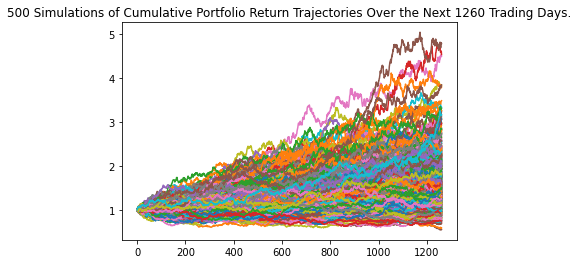

In [43]:
# Plot simulation outcomes
line_plot_five_years = MC_five_years.plot_simulation()

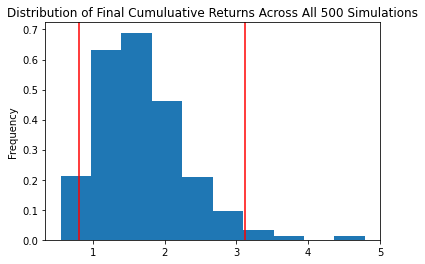

In [44]:
# Plot probability distribution and confidence intervals
hist_plot_five_years = MC_five_years.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
five_years_summary = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(five_years_summary)

count           500.000000
mean              1.684024
std               0.615514
min               0.551805
25%               1.247577
50%               1.571017
75%               2.013409
max               4.788764
95% CI Lower      0.811522
95% CI Upper      3.114828
Name: 1260, dtype: float64


In [46]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_years_summary[8] * initial_investment, 2)
ci_upper_five = round(five_years_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $40576.12 and $155741.42


### Ten Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30, .70],
    num_simulation = num_sims,
    num_trading_days = 252 * 10
)

In [57]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992893,0.998840,0.993115,1.007701,0.986047,0.993972,0.995080,1.005096,0.995551,0.989951,...,1.003821,0.999473,0.991624,0.982371,1.011597,1.000981,1.000163,1.004065,0.993945,0.991216
2,0.991778,0.991682,0.986235,1.004755,1.005554,0.990319,0.991340,0.994713,0.987082,0.971302,...,1.011253,1.005397,0.992600,0.978887,1.018966,1.001720,1.001193,0.994903,0.981731,1.002622
3,0.996515,0.993872,0.977899,0.998562,1.007183,0.998833,0.988480,0.985806,0.984453,0.983874,...,1.022246,1.002473,0.997611,0.983783,1.008629,0.984038,0.998740,1.005770,0.975077,1.004742
4,0.991863,0.995313,0.982644,0.994526,1.006134,0.990279,0.973885,0.994410,0.974905,0.975903,...,1.022293,0.999331,0.997442,0.998972,1.009688,0.984565,0.991705,0.998501,0.990630,0.994876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.750743,2.382384,2.793177,1.362367,4.528282,3.011910,5.647043,2.927220,2.876843,1.368411,...,3.036161,5.046922,5.832512,2.965117,4.677552,3.009180,2.186263,2.941518,6.086519,2.617847
2517,3.807963,2.361436,2.781775,1.368093,4.590429,3.024058,5.621273,2.942757,2.863601,1.373418,...,3.069590,5.059852,5.807235,3.012712,4.696897,2.989116,2.144571,2.928115,6.124214,2.592677
2518,3.800357,2.363910,2.826562,1.355954,4.605698,3.024322,5.624333,2.946358,2.890505,1.388412,...,3.042616,5.062067,5.778612,3.035356,4.708331,2.955461,2.127828,2.920671,6.035911,2.614073
2519,3.794261,2.357727,2.824571,1.339341,4.596354,3.070763,5.589366,2.938593,2.899682,1.394454,...,3.050057,5.040349,5.841674,3.009512,4.756367,2.970993,2.115378,2.886530,6.076792,2.620063


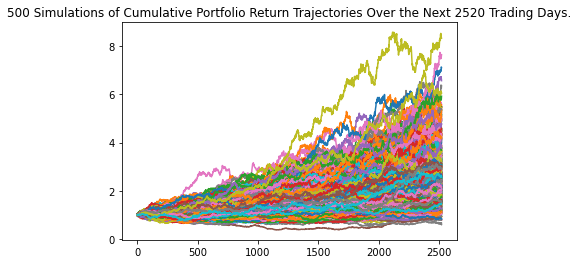

In [58]:
# Plot simulation outcomes
line_plot_ten_years = MC_ten_years.plot_simulation()

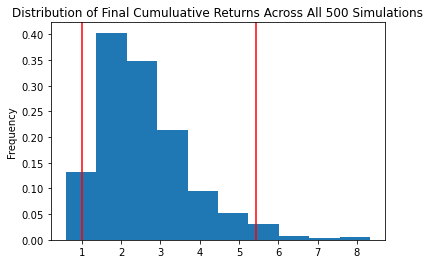

In [61]:
# Plot probability distribution and confidence intervals
hist_plot_ten_years = MC_ten_years.plot_distribution()

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_years_summary = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(ten_years_summary)

count           500.000000
mean              2.592369
std               1.166780
min               0.596242
25%               1.748771
50%               2.379678
75%               3.108103
max               8.334019
95% CI Lower      1.016698
95% CI Upper      5.429307
Name: 2520, dtype: float64


In [63]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_years_summary[8] * initial_investment, 2)
ci_upper_ten = round(ten_years_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $101669.82 and $542930.66
